In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Producing a PCA 
This code will take an input of a featurematrix with an Id column and intensities for each sample with the names PX_tXh

In [98]:
software = input("What software is being used:")

In [99]:
# Importing the data
df = pd.read_csv(r"C:\Users\adamg\OneDrive - The University of Liverpool\Project Work\MZmine\MZmine_Feature_Matrix.csv")


df.head

<bound method NDFrame.head of       id  P1_t1h  P1_t0h  P1_t6h  P2_t3h  P2_t4h  P1_t5h     P2_t0h  P1_t8h  \
0      1     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
1      2     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
2      3     NaN     NaN     NaN     NaN     NaN     NaN  168.14813     NaN   
3      4     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
4      5     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
..   ...     ...     ...     ...     ...     ...     ...        ...     ...   
976  977     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
977  978     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
978  979     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
979  980     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   
980  981     NaN     NaN     NaN     NaN     NaN     NaN        NaN     NaN   

     P1_t9h  ...  P8_

# Data cleaning
The data needs to be cleaned first. This means removing features that are only present in <10% of the samples, filling in missing values through k-nearest neighbour machine learning and scaling the data 

## Removing rows with low amounts of data

In [100]:
# Before cleaning
df.shape

(981, 90)

In [101]:
threshold = 0.1

# Finds the number of columns with data in 
data_cols = df.notna().sum(axis=1)

df = df[data_cols >= df.shape[1]*threshold]

In [102]:
# After filtering
df.shape

(472, 90)

## Scaling the data

In [103]:
x = df.iloc[:,1:].T

# Extracting Patient Names
patients = [name.split('_')[0] for name in x.index]
for i, patient in enumerate(patients):
    patients[i] = patient.replace("P", "Patient ")

x = StandardScaler().fit_transform(x)

## Filling in missing values 
Using k-nearest neighbour

In [104]:
# Can adjust the number of neighbours
num_neighbours = 2

imputer = KNNImputer(n_neighbors=num_neighbours, weights="uniform")

x = imputer.fit_transform(x)
x

array([[ 0.44936792, -0.52721962,  0.75807004, ..., -0.26889446,
        -1.67912297, -0.43779574],
       [-0.90211455, -0.04055536,  0.39052093, ...,  0.21886759,
        -1.06945299, -1.3108697 ],
       [ 0.65209029,  0.32444284,  0.1148591 , ...,  0.21886759,
         0.25244829, -0.42923619],
       ...,
       [ 0.24664555, -0.40555355,  0.29863365, ...,  0.24700771,
        -0.89281963,  1.86900262],
       [ 0.36827897, -0.89221782, -0.7121264 , ...,  1.13342143,
         0.50885155, -0.78873723],
       [ 0.40882345,  0.44610891,  0.02297182, ...,  1.41951264,
        -0.36291955,  0.78621972]])

# Performing PCA analysis

In [105]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=["Principal Component 1","Principal Component 2"])
principalDf["Patient"] = patients

principalDf

,Principal Component 1,Principal Component 2,Patient
0,-6.838436,-3.904070,Patient 1
1,0.374311,-5.717795,Patient 1
2,9.676525,-5.901818,Patient 1
3,6.956253,-5.153445,Patient 2
4,6.609501,-0.434728,Patient 2
...,...,...,...
84,-6.269147,3.411371,Patient 9
85,-8.826499,0.635528,Patient 9
86,-9.362042,-0.379656,Patient 8
87,-7.084473,5.429740,Patient 9


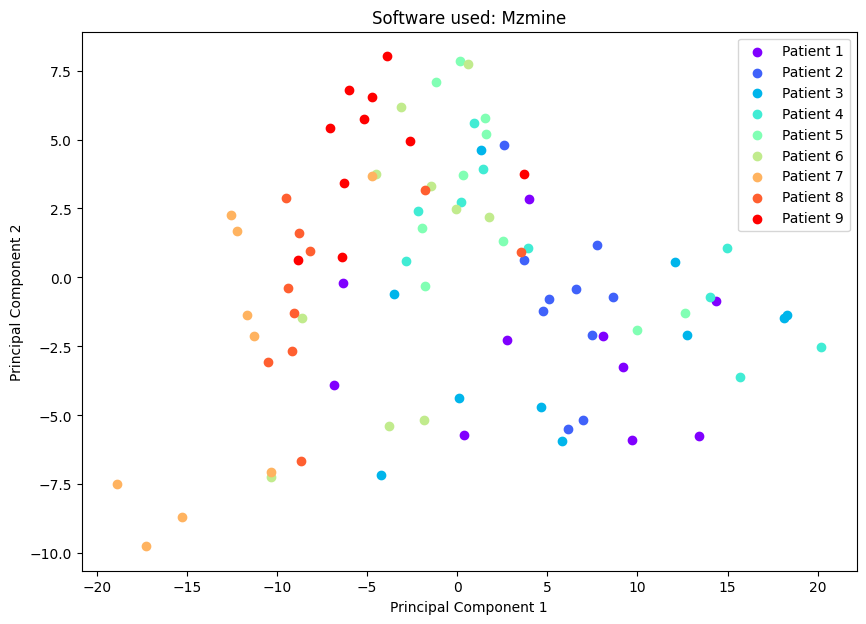

In [106]:
# Asigns each patient a colour
plt.figure(figsize=(10, 7))
unique_patients = np.unique(patients)
colours = plt.cm.rainbow(np.linspace(0, 1, len(unique_patients)))

# Plots each patients PCA results
for patient, colour in zip(unique_patients, colours):
    indices = principalDf['Patient'] == patient
    plt.scatter(principalDf.loc[indices, 'Principal Component 1'], principalDf.loc[indices, 'Principal Component 2'], label=patient, color=colour)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Software used: {software}')
plt.legend()
plt.show()